In [11]:
import networkx as nx
import pandas as pd
from bs4 import BeautifulSoup
import matplotlib.pyplot as plt

In [116]:
# I grabbed the Marvel dataset from 2018 here:
# https://github.com/melaniewalsh/sample-social-network-datasets/blob/master/sample-datasets/marvel/marvel-network.graphml
soc_net = nx.read_graphml('marvel-network.graphml')

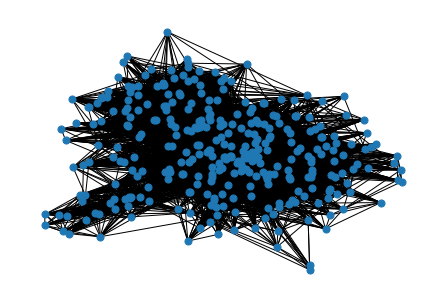

In [117]:
# let's take a look 
nx.spring_layout(soc_net)
options = {
    'with_labels':False,
    'node_size':50
}
nx.draw_spring(soc_net, **options)

In [118]:
# who is the most connected as of 2018?
max(dict(soc_net.degree()).items(), key = lambda x : x[1])

('Captain America', 258)

In [119]:
# makes sense - we were 3 Captain Marvel movies deep by then as Civil War had just come out in 2016
# let's Thanos this guy for a moment
soc_net.remove_node('Captain America')

In [120]:
# who is the most connected in this alternate reality 2018?
max(dict(soc_net.degree()).items(), key = lambda x : x[1])

('Wolverine / Logan', 219)

In [121]:
# this makes good sense as well since The Wolverine came out in 2013 and this daggery fellow is often around
# I do not have it in my heart to knock this legend out, so who is a loner?
min(dict(soc_net.degree()).items(), key = lambda x : x[1])

('Asp Ii / Cleo', 7)

In [122]:
# I have no idea who that is ... good on you for 7, Cleo
# who of the remaining has the largest network across distances
max(nx.eigenvector_centrality(soc_net))

'Zeus'

In [123]:
# all hail Zeus, though many of his friends do not know him that well 
# who is most likely to be visited
max(nx.betweenness_centrality(soc_net))

'Zeus'

In [124]:
# I owe the fellow an apology
# if he really is an everybody person, how well does he know Cleo?
nx.shortest_path(soc_net, 'Zeus', 'Asp Ii / Cleo')

['Zeus', 'Sub-mariner / Namor Ma', 'Jarvis, Edwin', 'Asp Ii / Cleo']

In [125]:
# knowing someone through a sub-mariner and the butler of Howard Stark - that ain't friendship 
# who are the loneliest people and do they have hope of finding each other?  Cleo is one
heroes = dict(soc_net.degree()).items()
df = pd.DataFrame.from_dict(heroes)
df.sort_values(by=1)
# black mamba was so close to being our loneliest by a mere 1 slot

,0,1
317,Black Mamba / Tanya Se,7
316,Asp Ii / Cleo,7
279,"Wing, Colleen",12
325,Deadpool / Jack / Wade W,13
315,Diamond Lil / Lillian,13
...,...,...
100,Beast / Henry &hank& P,204
39,Vision,212
99,Thing / Benjamin J. Gr,213
38,Spider-man / Peter Parker,217


In [126]:
# date night - let's see if these two can find each other .... ever
nx.shortest_path(soc_net, 'Black Mamba / Tanya Se', 'Asp Ii / Cleo')
# something tells me this was not the most famous story in Marvel history.  glad they are together, though.

['Black Mamba / Tanya Se', 'Asp Ii / Cleo']

In [127]:
# is the purple people deleter nearby?
nx.shortest_path(soc_net, 'Thanos', 'Asp Ii / Cleo')

['Thanos', "Black Panther / T'chal", 'Jarvis, Edwin', 'Asp Ii / Cleo']

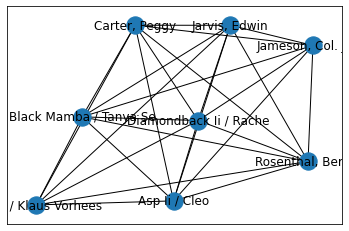

In [128]:
# stay safe out there, Cleo!
cleo = nx.ego_graph(soc_net, 'Asp Ii / Cleo')
nx.spring_layout(cleo)
nx.draw_networkx(cleo)

In [149]:
# [kettle drums] Thanos @ Infinite War - half of all life vanishes (half of this network also)
# monty python to lighten the mood
bring_out_your_dead = df.sample(n=int(len(df)/2), random_state=1)
print(bring_out_your_dead)

                          0    1
139  Psylocke / Elisabeth B  131
233  Firefist / Rusty Colli   32
214  Tilby, Trish / Patrici   33
185     Cooper, Dr. Valerie   69
138                  Gamora   58
..                      ...  ...
128       Hogun [asgardian]   43
46   She-hulk / Jennifer Wa  177
66   Quasar Iii / Wendell V  124
223  Banshee / Sean Cassidy   69
272              Scanner Ii   19

[163 rows x 2 columns]


In [154]:
# [gauntlet] *SNAP*
print(len(soc_net))
[soc_net.remove_node(x) for x in bring_out_your_dead[0]]
print(len(soc_net))

326
163


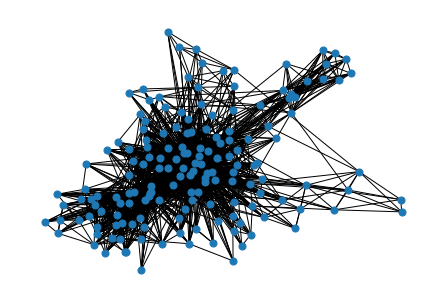

In [155]:
# is there anybody out there?
nx.draw_spring(soc_net, **options)

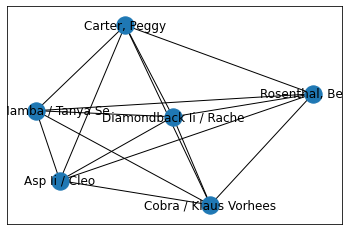

In [156]:
# are you there, Cleo?
cleo = nx.ego_graph(soc_net, 'Asp Ii / Cleo')
nx.draw_networkx(cleo)

In [157]:
# she survived!  who is our most connected hero now?
max(dict(soc_net.degree()).items(), key = lambda x : x[1])

('Scarlet Witch / Wanda', 94)

In [158]:
# what an odd faction of the multiverse - at least we still have this guy holding things together
max(nx.betweenness_centrality(soc_net))

'Zeus'

In [161]:
# out of curiosity, did Thanos nuke Thanos?  
# I always that thought would be a great cinematic moment well in line with his ethos
nx.shortest_path(soc_net, 'Thanos', 'Zeus')
# ... poetic

NodeNotFound: Either source Thanos or target Zeus is not in G